<a href="https://colab.research.google.com/github/karanbhatt1/MachineLearning/blob/main/RNNHandson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train # it is a list of encoded words.

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
imdb.get_word_index() # it is the word embeding along with the word

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [7]:
# tokenization is already done.

In [8]:
# WE NEED TO NORMALIZE THE DATA. EVERY THING SHOULD BE OF EQUAL
# LENGTH

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# NORMALIZING THE DATA :
# train_data, test_data
x_train_pad = pad_sequences(x_train,maxlen=200)
x_test_pad = pad_sequences(x_test,maxlen=200)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.metrics import Precision,Recall
from tensorflow.keras.layers import Dense,Embedding,Flatten,SimpleRNN

In [12]:
def brain():
  custom_model = Sequential([
      Embedding(10000,16), # embedding is the first input layer where
      SimpleRNN(32),
      Dense(1,activation='sigmoid')
  ])
  return custom_model

In [13]:
br = brain()

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

early_stop = EarlyStopping(monitor='accuracy',patience=3,restore_best_weights=True)
optimizer = Adam(learning_rate=0.0001)

br.compile(optimizer=optimizer ,loss='binary_crossentropy',metrics=['accuracy','mse'])

In [15]:
br.fit(x_train_pad,y_train,epochs=5,batch_size=32,validation_split=0.2,callbacks=[early_stop])

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 42ms/step - accuracy: 0.5420 - loss: 0.6858 - mse: 0.2464 - val_accuracy: 0.7410 - val_loss: 0.5889 - val_mse: 0.1992
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6929 - loss: 0.6134 - mse: 0.2112 - val_accuracy: 0.7868 - val_loss: 0.5465 - val_mse: 0.1794
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.8087 - loss: 0.4884 - mse: 0.1547 - val_accuracy: 0.8116 - val_loss: 0.4476 - val_mse: 0.1403
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.8412 - loss: 0.3959 - mse: 0.1196 - val_accuracy: 0.8250 - val_loss: 0.4110 - val_mse: 0.1278
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.8709 - loss: 0.3357 - mse: 0.0983 - val_accuracy: 0.8350 - val_loss: 0.3844 - val_mse: 0.1191


/tmp/ipython-input-4288974653.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


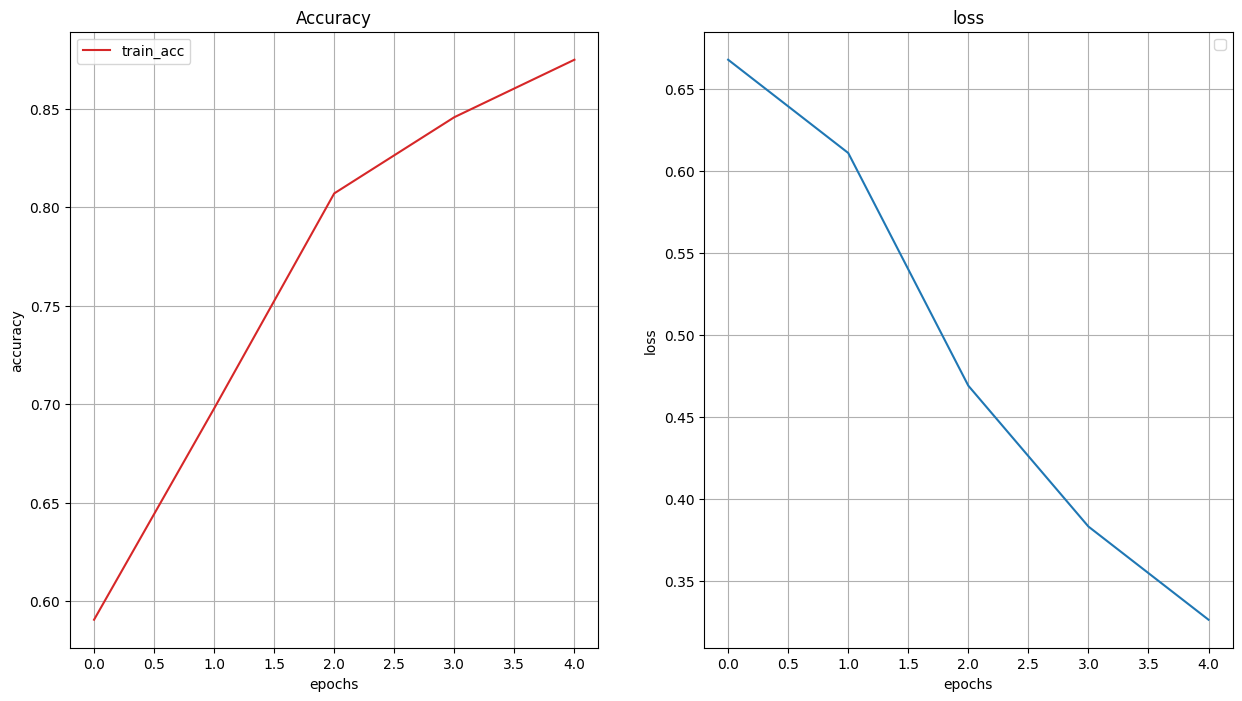

In [16]:
fig , ax = plt.subplots(1,2,figsize=(15,8))
ax[0].plot(br.history.history['accuracy'],color='tab:red',label='train_acc')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].grid()
ax[0].legend()

ax[1].plot(br.history.history['loss'])
ax[1].set_title('loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend()
ax[1].grid()

In [47]:
fig.savefig('modelplot.png')

In [17]:
result = br.evaluate(x_test_pad,y_test) # The model is overfitted

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8306 - loss: 0.3919 - mse: 0.1222


In [18]:
print(f'The accuracy of model on testing is {result[1]*100}%. /n it is less than the training accuracy so the model is clearly overfitted')

The accuracy of model on testing is 83.08799862861633%. /n it is less than the training accuracy so the model is clearly overfitted


In [19]:
# The Training Accuracy is: 100% And The Testing Accuracy is 77.1% so we need to
# tune the model.

In [29]:
from keras import regularizers
from tensorflow.keras.layers import LSTM

In [42]:
# implementing the LSTM :
from keras import regularizers
model_lstm = Sequential([
    Embedding(10000,64,input_length=200),
    keras.layers.LSTM(64,dropout=0.2,kernel_regularizer=regularizers.l2(0.0001)),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model_lstm.fit(x_train_pad,y_train,epochs=5,batch_size=32)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 104ms/step - accuracy: 0.7122 - loss: 0.5338
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.8856 - loss: 0.2952
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.9251 - loss: 0.2051
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - accuracy: 0.9445 - loss: 0.1614
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 107ms/step - accuracy: 0.9596 - loss: 0.1215


In [46]:
model_lstm.evaluate(x_test_pad,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8264 - loss: 0.4798


[0.47233647108078003, 0.8273599743843079]

In [2]:
#This lstm model is also overfitting